# Palmer Penguins Project

###### import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Dataset/penguins_lter.csv")

In [3]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df.drop(columns=['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Comments','Delta 15 N (o/oo)','Delta 13 C (o/oo)'],axis=1,inplace=True)

In [5]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.shape

(344, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [12]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [13]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          146
Gentoo penguin (Pygoscelis papua)            120
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

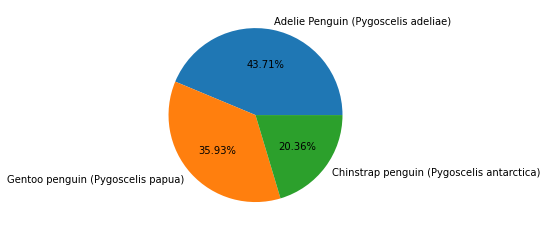

In [15]:
plt.pie(x=df['Species'].value_counts(),data=df,autopct="%.2f%%",labels=['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'])
plt.show()


In [16]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [17]:
df['Island'].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: Island, dtype: int64

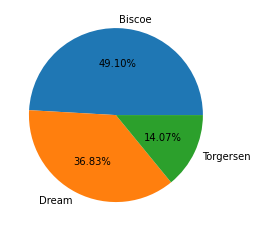

In [18]:
plt.pie(x=df['Island'].value_counts(),data=df,labels=['Biscoe', 'Dream', 'Torgersen'],autopct="%.2f%%")
plt.show()

In [19]:
df[df['Sex']=="."]=np.nan

In [20]:
df.dropna(inplace=True)

In [21]:
df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [22]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

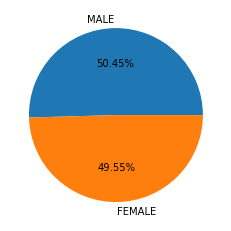

In [23]:
plt.pie(x=df['Sex'].value_counts(),data=df,autopct="%.2f%%",labels=['MALE', 'FEMALE'])
plt.show()

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

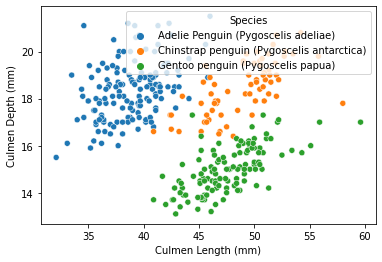

In [24]:
sns.scatterplot(x=df["Culmen Length (mm)"],y=df["Culmen Depth (mm)"],hue=df['Species'])

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Count'>

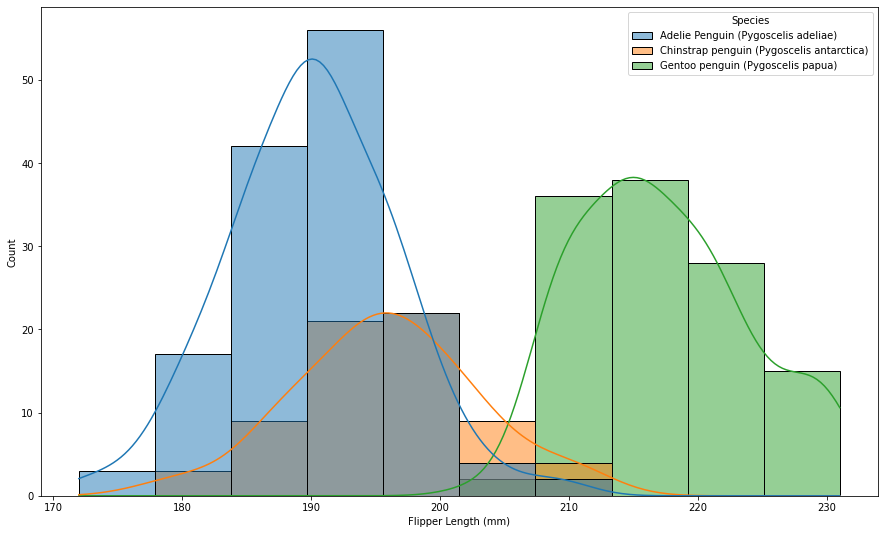

In [31]:
plt.figure(figsize=(15,9))
sns.histplot(x=df['Flipper Length (mm)'],data=df,kde=True,hue=df['Species'])

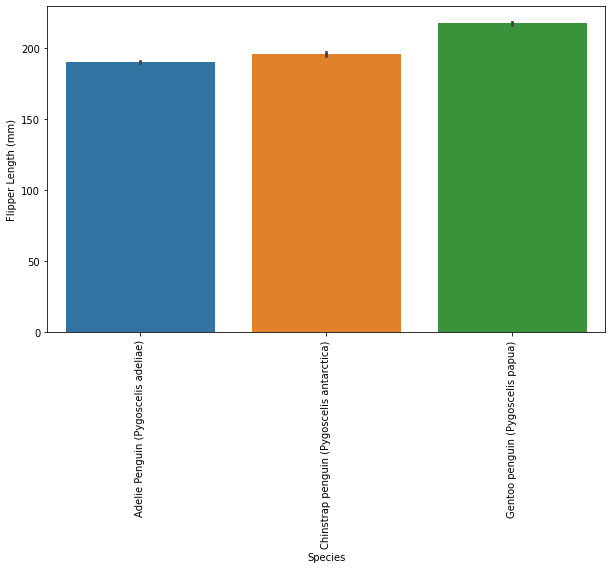

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Species'],y=df['Flipper Length (mm)'],data=df)
plt.xticks(rotation="vertical")
plt.show()

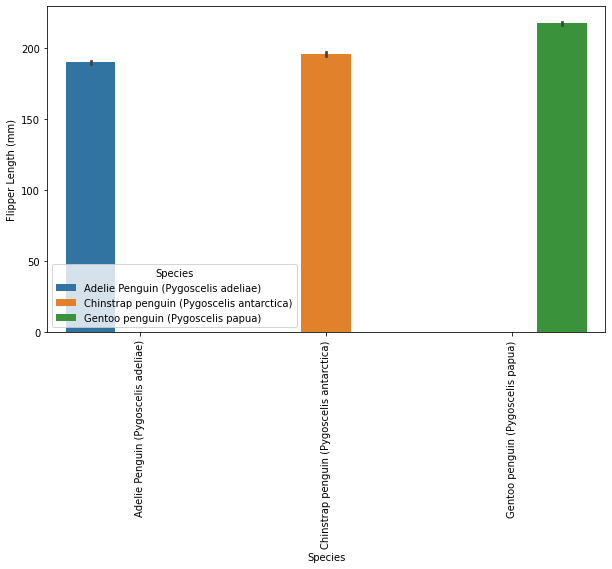

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Species'],y=df['Flipper Length (mm)'],data=df,hue=df['Species'])
plt.xticks(rotation="vertical")
plt.show()

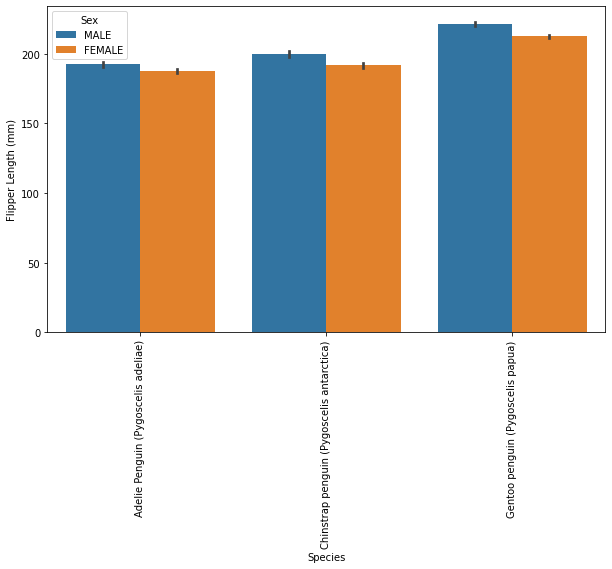

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Species'],y=df['Flipper Length (mm)'],data=df,hue=df['Sex'])
plt.xticks(rotation="vertical")
plt.show()

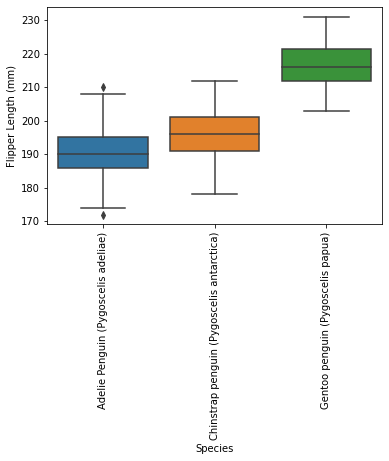

In [45]:
sns.boxplot(x=df['Species'],y=df['Flipper Length (mm)'],data=df)
plt.xticks(rotation='vertical')
plt.show()

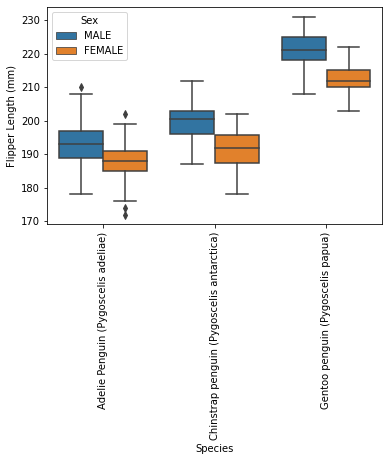

In [46]:
sns.boxplot(x=df['Species'],y=df['Flipper Length (mm)'],data=df,hue=df["Sex"])
plt.xticks(rotation='vertical')
plt.show()

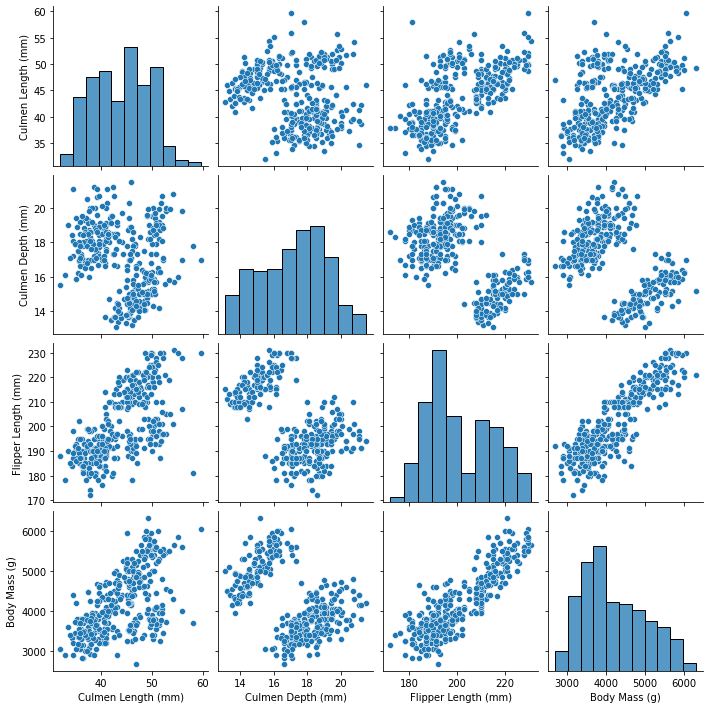

In [51]:
sns.pairplot(data=df)

In [57]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,MALE


In [58]:
df.drop(columns=['Island','Sex'],axis=1,inplace=True)

In [59]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0


# Model Training

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
X=df.drop(columns=['Species'])
y=df['Species']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
lr_pred=lr.predict(X_test)
knn_pred=knn.predict(X_test)
dt_pred=dt.predict(X_test)

In [84]:
print(lr.score(X_test,y_test)*100)
print(knn.score(X_test,y_test)*100)
print(dt.score(X_test,y_test)*100)

98.50746268656717
82.08955223880598
98.50746268656717


In [87]:
import pickle

In [88]:
pickle.dump(lr,open("palmerpenguin.pkl",'wb'))

In [90]:
model=pickle.load(open('palmerpenguin.pkl','rb'))

In [85]:
X_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
30,39.5,16.7,178.0,3250.0
317,46.9,14.6,222.0,4875.0
79,42.1,19.1,195.0,4000.0
201,49.8,17.3,198.0,3675.0
63,41.1,18.2,192.0,4050.0


In [86]:
y_test.head()

30           Adelie Penguin (Pygoscelis adeliae)
317            Gentoo penguin (Pygoscelis papua)
79           Adelie Penguin (Pygoscelis adeliae)
201    Chinstrap penguin (Pygoscelis antarctica)
63           Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [92]:
model.predict([[39.5,16.7,178,3250]])[0]

'Adelie Penguin (Pygoscelis adeliae)'